**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Predicting Music Genre of Songs using Support Vector Machines Method

## Abstract

In this report, we discuss and present an algorithm that predicts music genres of songs. Each song contains 264 features accumulating MFCC,  The algorithm applies Support Vector Machines (SVM) method on an altered dataset with reduced features to predict labels. SVM works as supervised learning and outputs distinguished data. The algorithm distinguishes between different genres of songs with 74.67% accuracy while predicting of training data and 66.33% accuracy while predicting on testing data (from Kaggle Competition). The logistic loss incurred on testing data is 0.16802 (from Kaggle Competition) while showing loss on training data of 0.77727. With this accuracy, the algorithm can be used predict genres from other types of datas too like movies or books.

## 1. Introduction

### 1.1. Background
Aalto University offers a mandatory and introductory course for Machine Learning, known as Machine Learning Basic Principles. The course deliverables include a Data Analysis Project. The Project can be done alone or in a team of two students; and it shall be done using the Python language in Jupyter Notebook IDE.

### 1.2. Problem Statement
For Autumn 2018, the Data Analysis Project task participating students to create a music-genre classification algorithm. The data analysis project involves the design of a complete machine learning solution. In particular, the project revolves around the task of identifying the music genre of songs. 

### 1.3. Motivation
The primary motivation for us as inspiring machine learning engineers is to solve a real time problem using machine learning. We will learn about approching a machine learning problem from scratch, using variuos python libraries for machine learning, handling a large data set, feature scaling, feature reduction, working with various ML algorithms and their parameters.  

### 1.4. Desctiption of Contents

The feature data set of 10907 songs is provided. 4363 songs have their genres (label) given for training and other 6544 songs are given without labels for testing and hence, the algorithm needs to predict their labels.

## 2. Data analysis

The data provided about songs contain 10907 rows and 264 columns. The columns represents features of the song. The feature vector of each song consists of 264 dimensions: 168 values for the rhythm patterns (24 bands, 7 statistics), 48 values for the chroma (12 bands, 4 statistics), and 48 values for the MFCCs (12 bands, 4 statistics).

4363 rows (songs) and used for training and labels are provided. Other 6544 rows (songs) are for testing and labels needs to be predicted.

The genres corresponds to a numberical as following
1. 'Pop_Rock'
2. 'Electronic'
3. 'Rap'
4. 'Jazz'
5. 'Latin'
6. 'RnB'
7. 'International'
8. 'Country'
9. 'Reggae'
10. 'Blues'

### 2.1. Import Library and Data

Libraries required : `pandas` [1], `numpy` [2], `sklearn` [3] and `matplotlib` [4]

Data imported : `train_data.csv`, `train_labels.csv` and `test_data.csv`

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss
from sklearn.metrics import recall_score, classification_report, confusion_matrix

/Users/rohitsaluja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rohitsaluja/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the data and cleanup
dfx = pd.read_csv("train_data.csv", header = None)
dfy = pd.read_csv("train_labels.csv" , header= None)
dftest =  pd.read_csv("test_data.csv", header = None)
## Create Label List
Y_train=[]
for m in dfy.as_matrix().tolist():
    Y_train += m

/Users/rohitsaluja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


### 2.2 Normalise and Analyse Data

The training data is normalised because after observing it we can clearly that some value are small (eg 0.04 , 0.06 ) and some are some values are extemely large in comparison (eg 6000,7000), hence the algorithm will most likely be biased towards larger values (by assigning bigger weights to larger values) . Most, if not all classifiers in machine learning calculate the Euclidean distance between the features. Euclidean distance is the “ordinary” straight-line distance between two points (vectors in a neural net) in Euclidean space.

Euclidean space is simply a 2 or 3 dimensional space. Hence, we normalize our features to remove any bias in our model. Also normalized data converges faster during backpropogation.

Next, data is analysed using class distribution and correlation matrix.

In [3]:
# Normalise Test and Train data
np_scaled_train = preprocessing.quantile_transform(dfx)
X_train = pd.DataFrame(np_scaled_train)

np_scaled_test = preprocessing.quantile_transform(dftest)
X_test = pd.DataFrame(np_scaled_test)

<function matplotlib.pyplot.show(*args, **kw)>

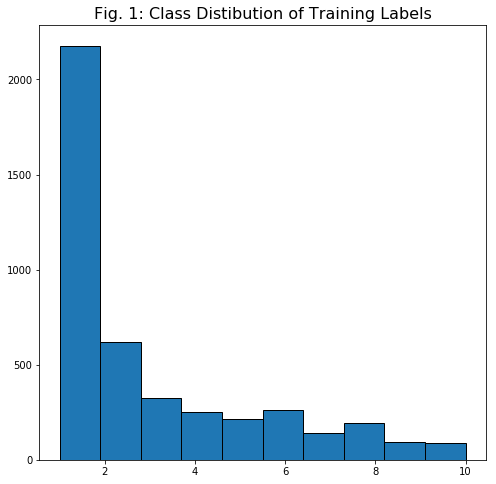

In [4]:
# Analysis of the input data 

# Histogram of Class Distribution
font = {'weight': 'normal',
        'size': 16,
       }
plt.figure(figsize=(8,8))
plt.hist(Y_train, bins=10, histtype='bar', lw=1, ec="black")
plt.title('Fig. 1: Class Distibution of Training Labels', fontdict=font)
plt.xticks(np.arange(0,12))
plt.show

Above, the histogram of class distribution is shown for training labels. It clearly shows that the most songs are from genre Pop_Rock.

<function matplotlib.pyplot.show(*args, **kw)>

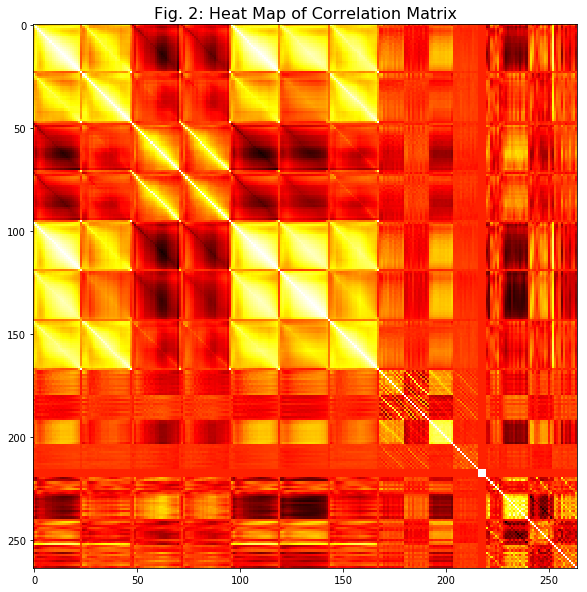

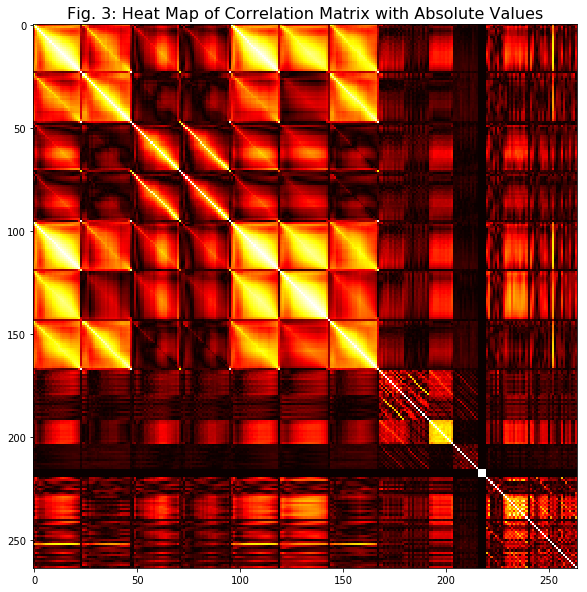

In [5]:
# Correlation Matrix
corr_matrix = X_train.corr()
corr_matrix_absolute = X_train.corr().abs()

# Heat map of Correlation Matrix
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Fig. 2: Heat Map of Correlation Matrix', fontdict=font)
plt.show
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix_absolute, cmap='hot', interpolation='nearest')
plt.title('Fig. 3: Heat Map of Correlation Matrix with Absolute Values', fontdict=font)
plt.show

Above, the heatmap of correlation matrix shows the features that have high correlation with darker shade of colour. 

## 3. Methods and experiments

The approach to obtain classification was straight-forward to begin with. Many popular classification methods were reviewed including Logistic Regression, Naive Bayes classifier, KNN and Random Forest Classifier. Soon, Support Vector Machines (SVM) Method shined, to be the winner. 

    "A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side." [5]

Basic implementation of SVM, quickly resulted in 57% accuracy in Kaggle Competition. This would have sufficed for many but we wanted to push towards building a better prediction model. We started trying various techniques including something simple as normalisation of data to complex feature reduction. 

An overview of complete methodology is shown as a flow-chart in Figure 4.
![Fig. 4: Methodology Flow-Chart](https://i.imgur.com/z8un7LB.jpg "Fig. 4: Methodology Flow-Chart")


### 3.1. Feature Reduction
In order to reduce features from the dataset, the correlation matrix was used. The following code takes upper triangular matrix from correlation matrix with absolute values and finds the columns that need to dropped. The threshold value set is 0.88, allowing any features with correlation above 0.88 or below -0.88 is removed.

In [6]:
# Feature Reduction using Upper Triangular Matrix from Correlation Matrix
upper_matrix = corr_matrix_absolute.where(np.triu(np.ones(corr_matrix_absolute.shape), k=1).astype(np.bool))
to_drop_index = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.88)]

X_train_reduced = X_train.drop(X_train.columns[to_drop_index], axis=1)
X_test_reduced = X_test.drop(X_test.columns[to_drop_index], axis=1)

### 3.2. Evaluation Methodology
The validation technique used is K - fold cross validation. In GridSearchCV the default value of K is 3.
In GridSearchCV [6], the parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [7]:
## ** WARNING **
## Do not run this block as it normally takes 2-5 hours to execute. 
## This block exist only to find best score, kernel, gamma and other values for SVM method used in next block. 
## Running this block is not required for the purpose of making model & predicting outcomes.

parameter_candidates = [
  {'C': [1, 10, 100, 1000,10000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000,10000], 'gamma': [0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X_train_reduced, Y_train) 
print('Best score for data1:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score for data1: 0.6509282603713041
Best C: 10
Best Kernel: rbf
Best Gamma: 0.01


### 3.3. Creating Model and Predicting
Finally, the machine learning model is created using SVM (Support Vector Machine) with values (the best parameter values) derived from GridSearchCV in previous step.
* kernel = rbf 
* C = 10 
* gamma = 0.01
* probability = True

After that, the model is used to predict accuracy and log_loss probability.

In [8]:
# Creating ML Model with SVC
model = SVC(kernel = 'rbf', C = 10,gamma=0.01, probability= True).fit(X_train_reduced, Y_train)

In [9]:
# Generating Predictions using Model for both Accuracy and Log-Loss
model_predictions_accuracy = model.predict(X_test_reduced)
model_predictions_log_loss = model.predict_proba(X_test_reduced)

<function matplotlib.pyplot.show(*args, **kw)>

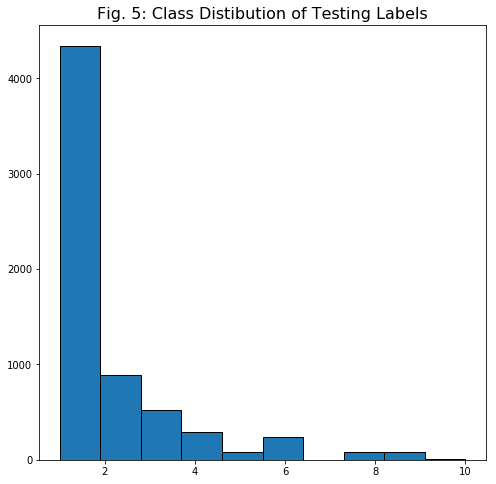

In [10]:
plt.figure(figsize=(8,8))
plt.hist(model_predictions_accuracy, bins=10, histtype='bar', lw=1, ec="black")
plt.title('Fig. 5: Class Distibution of Testing Labels', fontdict=font)
plt.show

### 3.4 Exporting Predictions to File
Here, header columns and row is added to the predictions and exported to csv.

In [11]:
# Export Predictions to File

## Accuracy
np.savetxt("accuracy_solution.csv", 
           np.dstack((np.arange(1, model_predictions_accuracy.size+1),model_predictions_accuracy))[0],
           delimiter=',', comments="", fmt='%i,%i',
           header="Sample_id,Sample_label")

## Log_loss
sample_id_column = np.zeros((X_test_reduced.shape[0],1), dtype=int)
for i in range (X_test_reduced.shape[0]): 
    sample_id_column[i] = i+1
log_loss_solution = np.hstack((sample_id_column, model_predictions_log_loss))
np.savetxt("log_loss_solution.csv", log_loss_solution, 
           delimiter=',', comments="", fmt=','.join(['%i'] + ['%1.4f']*10),
           header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10")

## 4. Results
After uploading exported files to Kaggle Competition compared to the train data, the result is:
* Kaggle Accuracy Score  = 0.66327
* Kaggle Log-loss Score = 0.16802


* Training Data Accuracy Score: 0.7467338986935594
* Training Data Log-Loss Score: 0.777266717787255

The confusion matrix, accuracy score and classification report in deployed below.

### 4.1. Data Accuracy Report
The Confusion Matrix shows that how accurately the model can predict Labels for training data in comparison to actual Labels, which were already given.

In [12]:
# Predicting Training Labels
accuracy_Y_train = model.predict(X_train_reduced)
log_loss_Y_train = model.predict_proba(X_train_reduced)

In [13]:
# Accuracy Score
print("Accuracy Score: ", accuracy_score(Y_train, accuracy_Y_train))
print("Log-Loss Score: ", log_loss(Y_train, log_loss_Y_train))

Accuracy Score:  0.7467338986935594
Log-Loss Score:  0.7781656923045049



 Table 1: Confusion Matrix of Training Data 

 [[2052   72   17    8    1   20    0    4    4    0]
 [ 126  459   19    4    0    8    0    0    2    0]
 [  28   12  279    0    1    5    0    0    1    0]
 [  66   15    3  159    1    9    0    0    0    0]
 [ 124    7   12    5   53    7    0    3    3    0]
 [  89   10   14    9    3  132    0    1    1    1]
 [ 106   10    7    5    2    6    1    2    2    0]
 [ 131    1    1    2    2    1    0   57    0    0]
 [  11    2   15    0    2    4    0    1   57    0]
 [  66    1    3    3    0    3    0    1    0    9]]


<function matplotlib.pyplot.show(*args, **kw)>

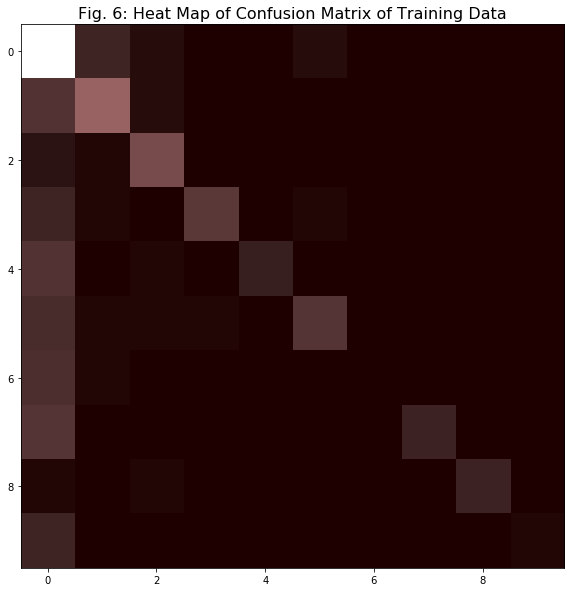

In [14]:
#Confusion matrix ...
conf_matrix = confusion_matrix(Y_train, accuracy_Y_train)
print('\033[1m' + "\n Table 1: Confusion Matrix of Training Data \n\n" + '\033[0m', conf_matrix)
plt.figure(figsize=(10,10))
plt.imshow(conf_matrix, cmap='pink', interpolation='nearest')
plt.title('Fig. 6: Heat Map of Confusion Matrix of Training Data', fontdict=font)
plt.show

In [15]:
# Classification Report
print('\033[1m' + "\n Table 2: Classification Report of Training Data \n\n" + '\033[0m'
      , classification_report(Y_train, accuracy_Y_train))


 Table 2: Classification Report of Training Data 

              precision    recall  f1-score   support

          1       0.73      0.94      0.82      2178
          2       0.78      0.74      0.76       618
          3       0.75      0.86      0.80       326
          4       0.82      0.63      0.71       253
          5       0.82      0.25      0.38       214
          6       0.68      0.51      0.58       260
          7       1.00      0.01      0.01       141
          8       0.83      0.29      0.43       195
          9       0.81      0.62      0.70        92
         10       0.90      0.10      0.19        86

avg / total       0.76      0.75      0.71      4363



## 5. Discussion/Conclusions

The results received from experimentation is 74.67% accuray on training data and 66.33% accuracy on Kaggle Competition.

The perdictions are analysed using confusion matrix and classification report.
A confusion matrix is a summary of prediction results on a classification problem.The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made. [7]

These scores represent all that is good and even not-so-good with the algorithm. The algorithm can predict the correct genre of given music 2 out of 3 times. Data Accuracy is one thing to consider but there are other model performance parameters like precision, recall and f1-score that should be looked at. The classification report genrerated in Table 2, shows all the parameters giving an average precision,recall and f1 score near 0.75.

Accuracy is a good measure when the target variable classes in the data are nearly balanced. Accuracy is not always the best measure when the target variable classes in the data are a majority of one class. 

The two scores of accuracy and log-loss give a good insight too. While the accuracy score works on whether or not the classifier was able to predict the correct genre, the log_loss score checks how likely the classifier could predict the genre of a given song. The log_loss gives the likely probabilities of each genre in regard to the song.

In order to improve the score in future, few techniques can be used including neural-network, better feature-reduction and more training data.

The study did provide with an algorithm based on machine learning that predicts music genres of given song 2 out of 3 times.

## 6. References

1. "Python Data Analysis Library", https://pandas.pydata.org
1. "NumPy", http://www.numpy.org
1. "scikit-learn: Machine Learning in Python", http://scikit-learn.org/stable/
1. "Matplotlib: Python plotting — Matplotlib 3.0.0 documentation", https://matplotlib.org
1. "Chapter 2 : SVM (Support Vector Machine) — Theory", https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
1. "sklearn.model_selection.GridSearchCV", http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
1. https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

## 7. Appendix
The following code/button hides all code blocks from the report leaving only text blocks and results.

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')